In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
# u_t + [f(u)]_x = 0
def f(u):
    return 0.5*u**2


# initial condition
def u_0(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0
    
    
# exact sol
def u_ex(x,t):
    if t <= 2:
        if x < 0:
            return 0
        elif 0 <= x < t:
            return x/t
        elif t <= x <= 1+t/2:
            return 1
        else:
            return 0
    else:
        if x < 0:
            return 0
        elif 0 <= x <= np.sqrt(2*t):
            return x/t
        else:
            return 0

In [25]:
def iterate_advection_sol(u_curr,k,h,method):
    nu = k/h
    u = u_curr[n,:]
    m = np.size(u)
    v = np.zeros(m)
    p = np.array(range(m))
    
    # Lax-Friedrichs
    if method == 0:
        for j in p:
            u_r = u[(j+1)%m]
            u_l = u[(j-1)%m]
            v[j] = 0.5*(u_r + u_l) - 0.5*nu*(f(u_r) - f(u_l))
    
    # Richtmyer
    if method == 1:
        # Lax-Friedrichs for first half step
        u_half = np.zeros(m)
        for j in p:
            u_j = u[j]
            u_r = u[(j+1)%m]
            u_half[j] = 0.5*(u_j + u_r) - 0.5*nu*(f(u_r) - f(u_j))
        # leapfrog
        for j in p:
            v[j] = u[j] - nu*(f(u_half[j]) - f(u_half[(j-1)%m]))
    
    # MacCormack
    if method == 2:
        # right upwind predictor
        u_pred = np.zeros(m)
        for j in p:
            u_pred[j] = u[j] - nu*(f(u[(j+1)%m]) - f(u[j]))
        # left upwind corrector
        for j in p:
            u_pj = u_pred[j]
            v[j] = 0.5*(u[j] + u_pj) - 0.5*nu*(f(u_pj) - f(u_pred[(j-1)%m]))
        
    
    # Godunov
    #if method == 3:
        
        
    return v

[0, 1, 2, 3, 4, 5, 6]


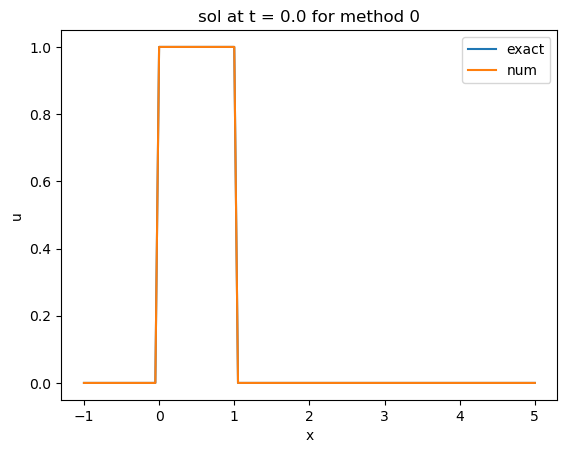

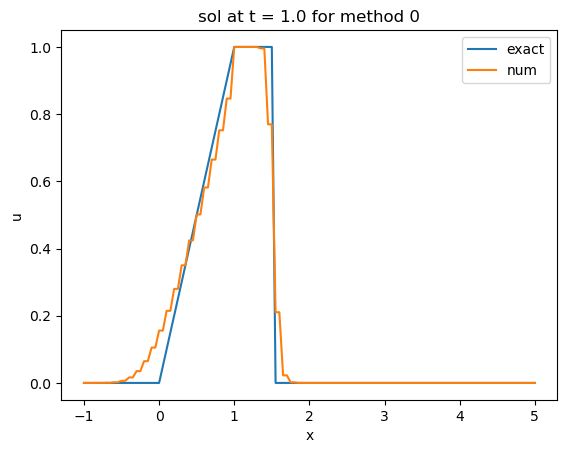

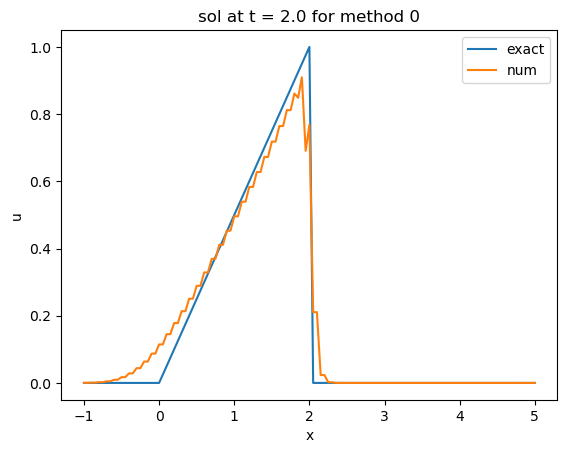

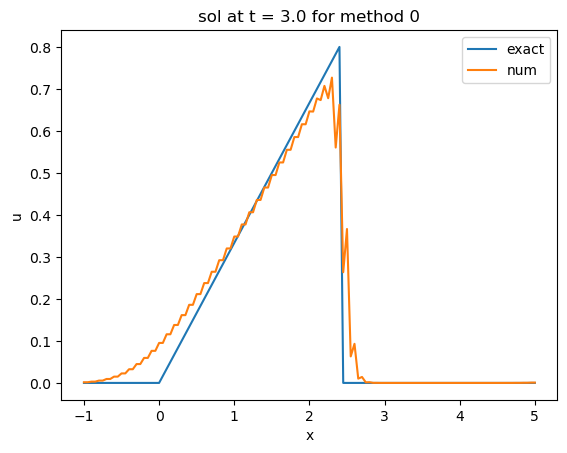

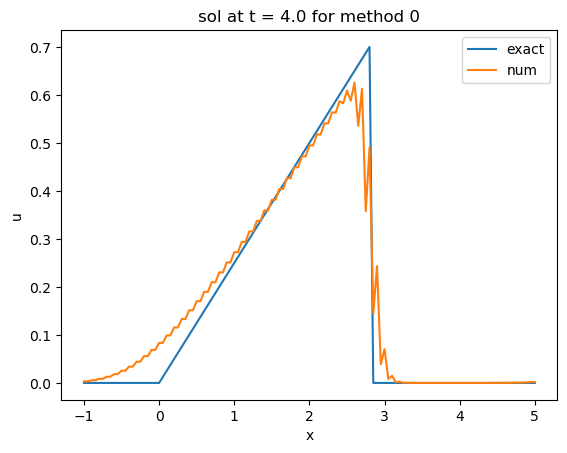

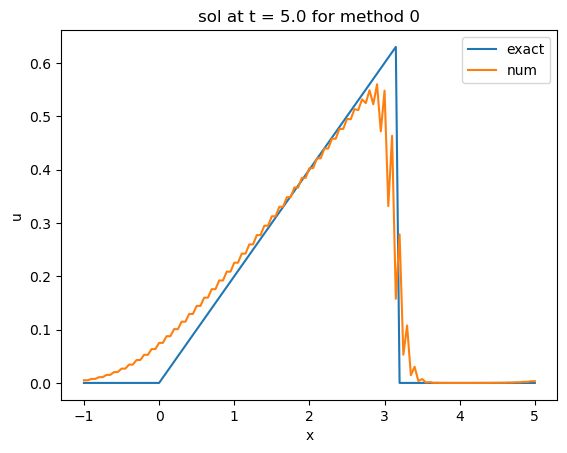

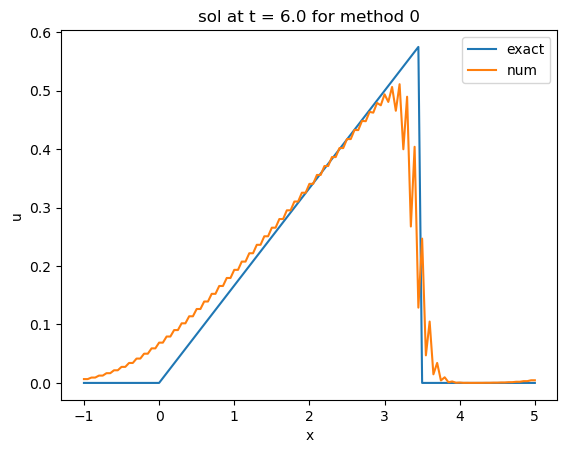

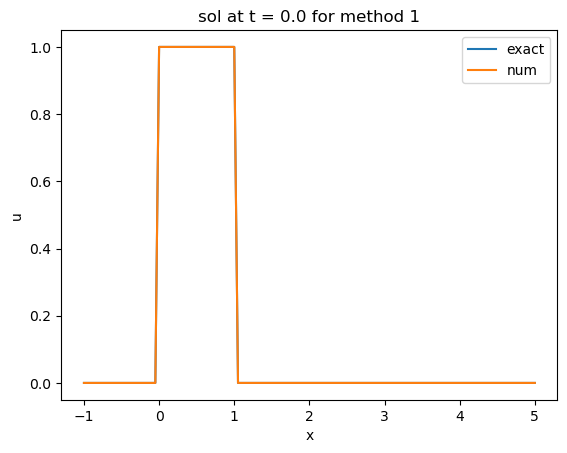

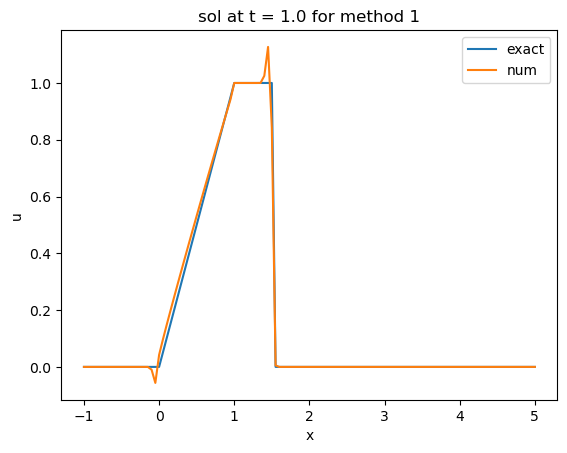

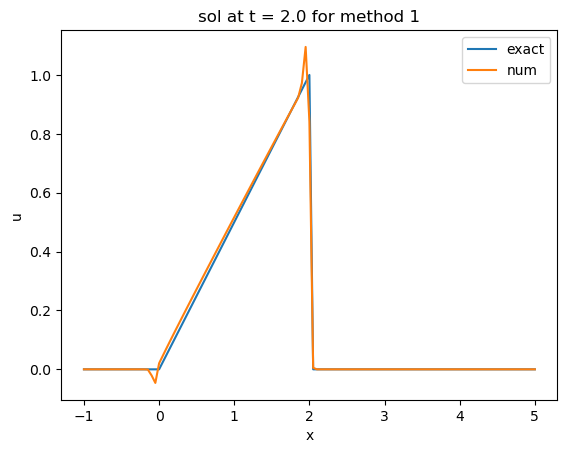

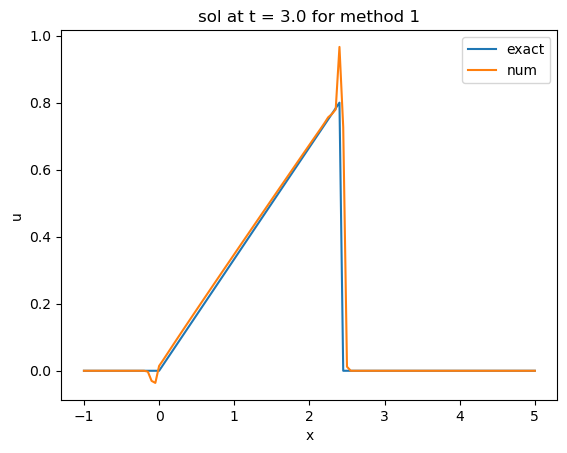

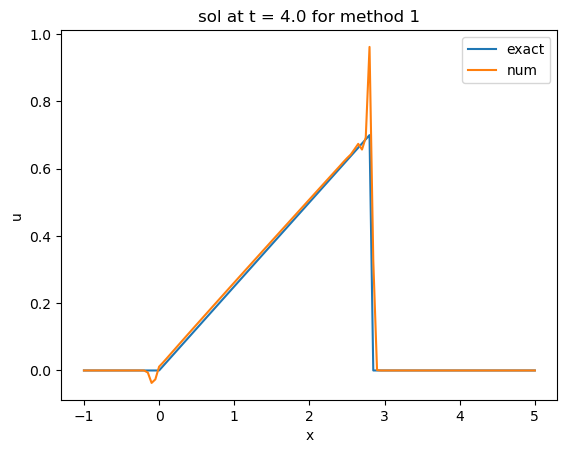

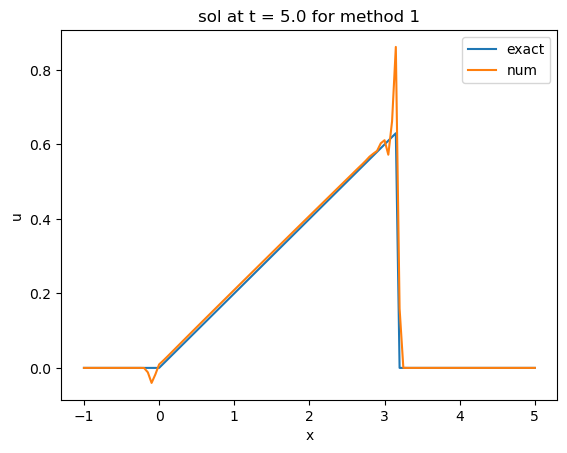

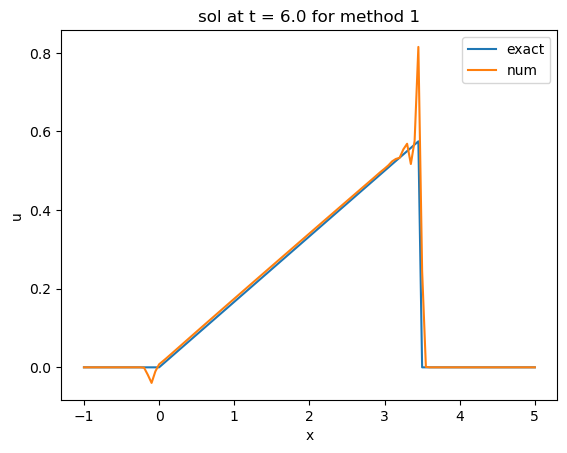

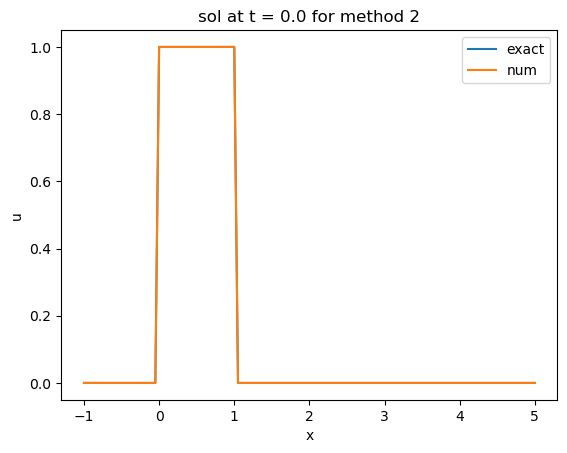

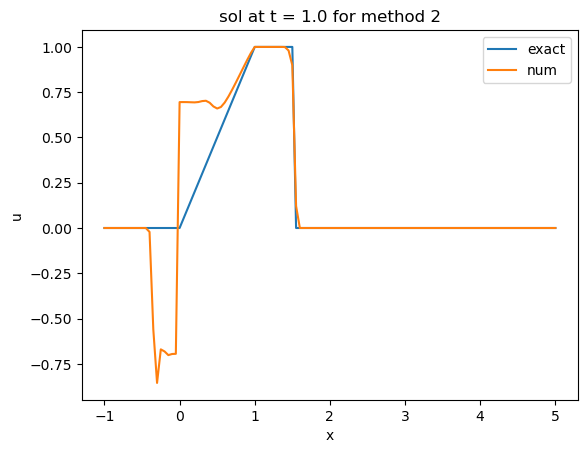

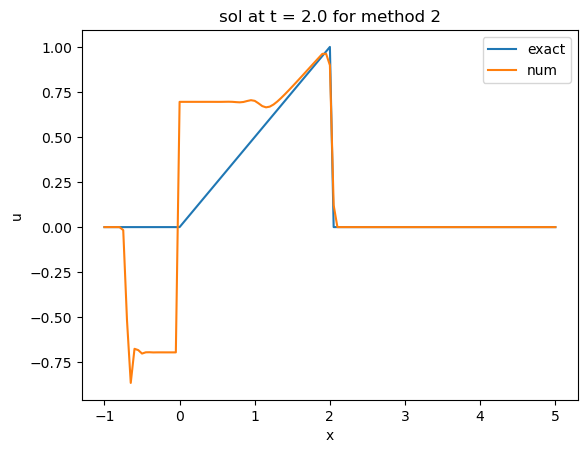

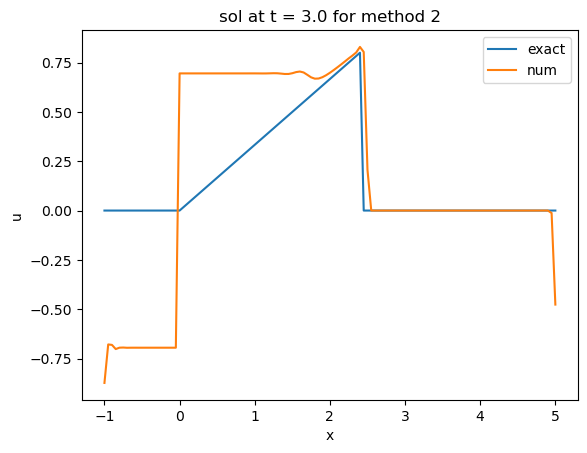

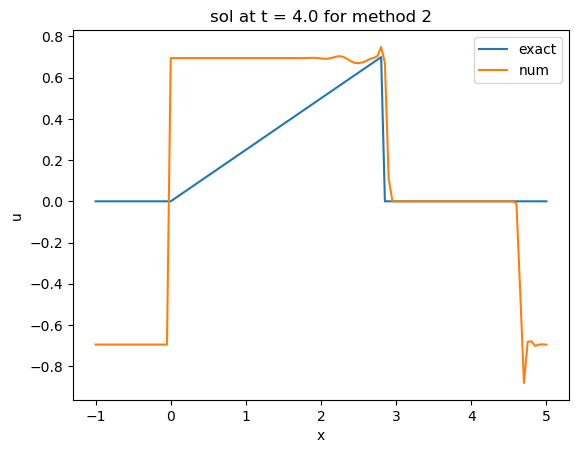

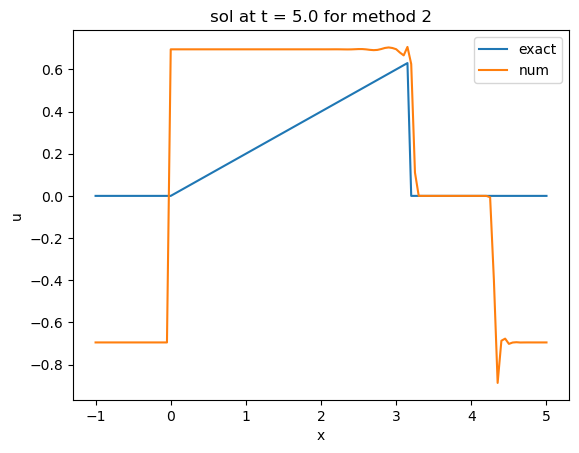

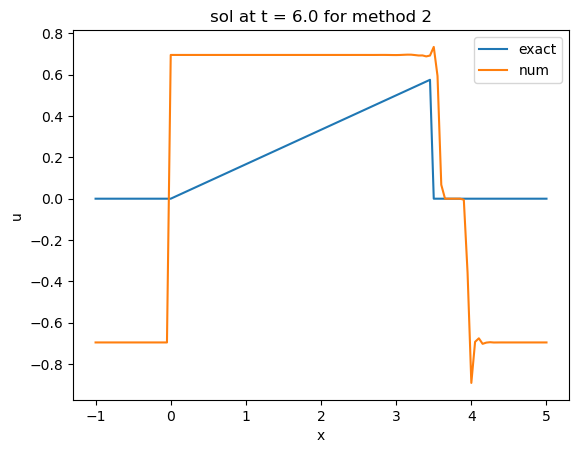

In [30]:
# parameters, mesh, initial conditions
h = 0.05
x_L = -1
x_R = 5
m = int((x_R-x_L)/h)
k = h
mesh = np.linspace(x_L,x_R,m+1)
T = 7
N = int(T/k)
u = np.zeros((N+1,m+1))
u[0,:] = [u_0(x) for x in mesh]

# iterate u
t_plot = range(T)
print(list(t_plot))
for method in range(3):
    for n in range(N):
        t = n*k
        if t in t_plot: # plot u at specific values of t
            u_exact = [u_ex(x,t) for x in mesh]
            plt.plot(mesh,u_exact,label='exact')
            plt.plot(mesh,u[n,:],label='num')
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('u')
            plt.title('sol at t = {} for method {}'.format(t,method))
            #plt.savefig('hw13 sol t = {} method {}.png'.format(t,method))
            plt.show()
        u[n+1,:] = iterate_advection_sol(u,k,h,method)